In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as sp
from scipy import linalg

In [20]:
t = 1.0
dt = 0.7

e1 = 0
e2 = 0
t2 = t-dt
t1 = t+dt
N = 8
T = np.array([[0,t2],
              [0,0]])
E = np.array([[e1,t1],
              [t1, e2]])

column = np.zeros(N)
column[1] = 1

offdiag = np.kron(linalg.circulant(column), T)
H = offdiag + np.kron(np.eye(N), E) + np.conj(np.transpose(offdiag))

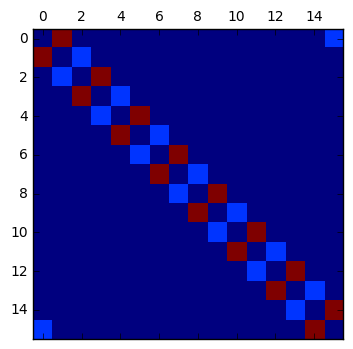

In [3]:
plt.matshow(H)

In [4]:
def Hk(k):
    a = 1.0
    return T*np.exp(-1.j * k * a ) + E + np.conj(np.transpose(T)) * np.exp(1.j * k * a )

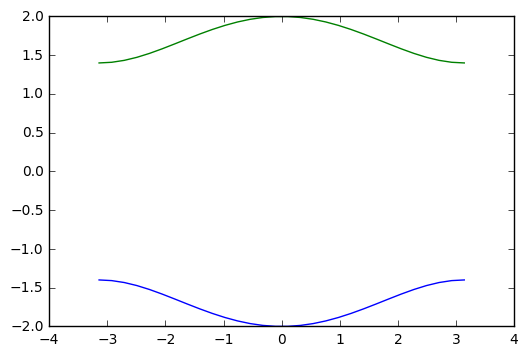

In [5]:
ks = np.linspace(-1 * np.pi, np.pi, 30)
energies = np.zeros((30, 2))
for i in range(30):
    energies[i,:] = linalg.eigvalsh(Hk(ks[i]))
plt.plot(ks,energies[:,0])
plt.plot(ks,energies[:,1])

In [6]:
sigma_z = np.array([[1,0],[0,-1]])
sigma_x = np.array([[0,1],[1,0]])
sigma_y = np.array([[0,-1.j],[1.j,0]])
def anticommutator(A,B):
    return A @ B + B @ A
anticommutator(sigma_z,Hk(0))

array([[ 0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j]])

Reflection Symmettry due to anticommutativity symmettry with $\sigma_z$

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:5: ComplexWarning: Casting complex values to real discards the imaginary part


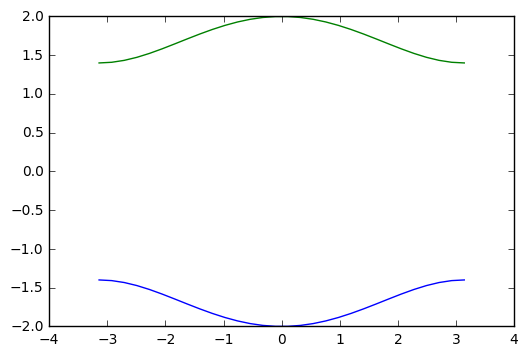

In [7]:
ks = np.linspace(-1 * np.pi, np.pi, 30)
energies = np.zeros((30, 2))
vecs = np.zeros((30, 2,2)) #last column picks eigenvector
for i in range(30):
    energies[i,:], vecs[i,:,:] = linalg.eigh(Hk(ks[i]))
plt.plot(ks,energies[:,0])
plt.plot(ks,energies[:,1])

In [8]:
lowerband = vecs[:,:,0]

In [9]:
from scipy import ifft

In [10]:
wannier = ifft(vecs, axis=0)

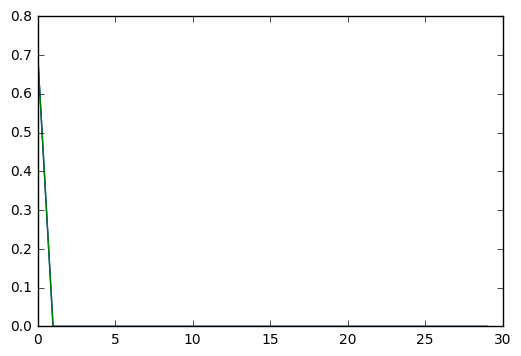

In [11]:
plt.plot(np.abs(wannier[:,0]))


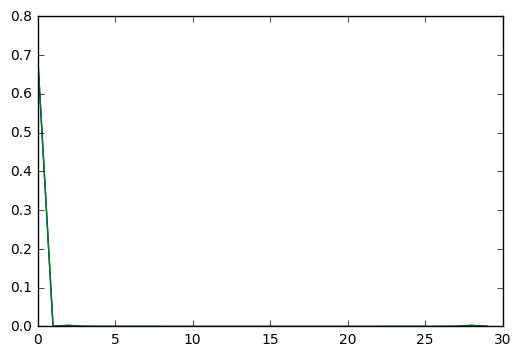

In [12]:
plt.plot(np.abs(wannier[:,1]))

In [13]:
np.vdot(lowerband,np.roll(lowerband,1,axis=0))


29.774179588092608

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:23: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:24: ComplexWarning: Casting complex values to real discards the imaginary part


(199.949611524-3.14104513718j)


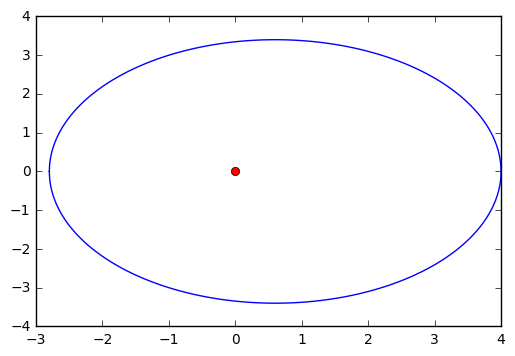

In [14]:
t = 1.0
dt = -0.7

e1 = 0
e2 = 0
t2 = t-dt
t1 = t+dt
N = 200
T = np.array([[0,t2],
              [0,0]])
E = np.array([[e1,t1],
              [t1, e2]])



ks = np.linspace(-1 * np.pi, np.pi, N)
energies = np.zeros((N, 2))
vecs = np.zeros((N, 2,2),dtype=np.complex) #last column picks eigenvector
hx = np.zeros(N)
hy = np.zeros(N)
for i in range(N):
    energies[i,:], vecs[i,:,:] = linalg.eigh(Hk(ks[i]))
    hx[i] = np.trace( Hk(ks[i]) @ sigma_x)
    hy[i] = np.trace( Hk(ks[i]) @ sigma_y)


plt.plot(hx,hy)
plt.plot([0], [0], 'ro')
lowerband = vecs[:,:,0]
print(np.vdot(lowerband[:],np.roll(lowerband,1,axis=0)[:]))

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:21: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:22: ComplexWarning: Casting complex values to real discards the imaginary part


(99.9796684033-0.000263052603033j)


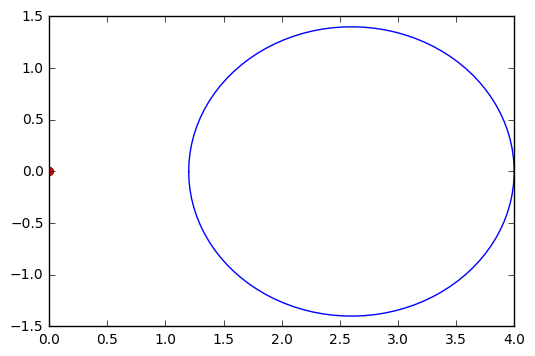

In [15]:
t = 1.0
dt = 0.3

e1 = 0
e2 = 0
t2 = t-dt
t1 = t+dt
N = 100
T = np.array([[0,t2],
              [0,0]])
E = np.array([[e1,t1],
              [t1, e2]])

ks = np.linspace(-1 * np.pi, np.pi, N)
energies = np.zeros((N, 2))
vecs = np.zeros((N, 2,2),dtype=np.complex) #last column picks eigenvector
hx = np.zeros(N)
hy = np.zeros(N)
for i in range(N):
    energies[i,:], vecs[i,:,:] = linalg.eigh(Hk(ks[i]))
    hx[i] = np.trace( Hk(ks[i]) @ sigma_x)
    hy[i] = np.trace( Hk(ks[i]) @ sigma_y)


plt.plot(hx,hy)
plt.plot([0], [0], 'ro')

lowerband = vecs[:,:,0]
print(np.vdot(lowerband[:],np.roll(lowerband,1,axis=0)[:]))

In [16]:
t = 1.0
dt = 0.3

e1 = 0
e2 = 0
t2 = t-dt
t1 = t+dt
N = 100
T = np.array([[0,t2],
              [0,0]])
E = np.array([[e1,t1],
              [t1, e2]])

ks = np.linspace(-1 * np.pi, np.pi, N)
energies = np.zeros((N, 2))
vecs = np.zeros((N, 2,2),dtype=np.complex) #last column picks eigenvector
for i in range(N):
    energies[i,:], vecs[i,:,:] = linalg.eigh(Hk(ks[i]))

lowerband = vecs[:,:,0]
lowerband[:,0 ] = np.exp(1.j * ks)* lowerband[:,0]
lowerband[:,1 ] = np.exp(1.j * ks)* lowerband[:,1]
print(np.vdot(lowerband[:-1],np.roll(lowerband,1,axis=0)[:-1]))

(98.781406403-6.25133950901j)


/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:21: ComplexWarning: Casting complex values to real discards the imaginary part


(100+0j)


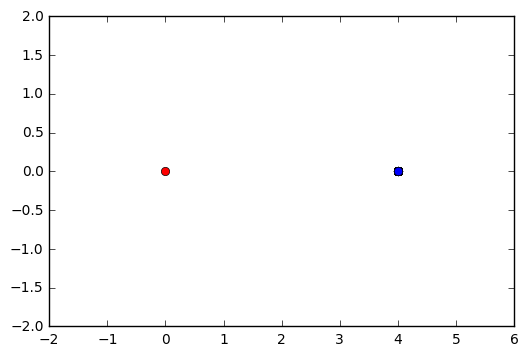

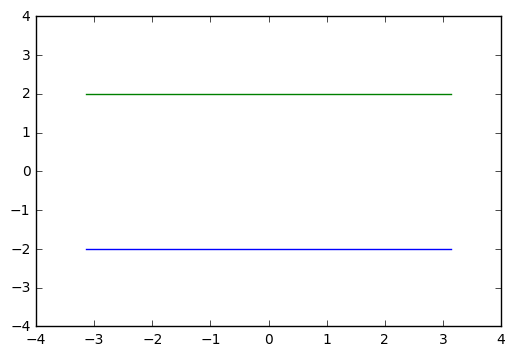

In [34]:
dt = 1
t = 1
e1 = 0
e2 = 0
t2 = t-dt
t1 = t+dt
N = 100
T = np.array([[0,t2],
              [0,0]])
E = np.array([[e1,t1],
              [t1, e2]])

ks = np.linspace(-1 * np.pi, np.pi, N)
energies = np.zeros((N, 2))
vecs = np.zeros((N, 2,2),dtype=np.complex) #last column picks eigenvector
hx = np.zeros(N)
hy = np.zeros(N)
for i in range(N):
    energies[i,:], vecs[i,:,:] = linalg.eigh(Hk(ks[i]))
    hx[i] = np.trace( Hk(ks[i]) @ sigma_x)
    hy[i] = np.trace( Hk(ks[i]) @ sigma_y)

#
plt.plot(hx,hy,'bo')
plt.plot([0], [0], 'ro')
plt.ylim([-2,2])
plt.xlim([-2,6])
plt.figure()
plt.plot(ks,energies[:,0])

plt.plot(ks,energies[:,1])
plt.ylim([-4,4])

lowerband = vecs[:,:,0]
print(np.vdot(lowerband[:],np.roll(lowerband,1,axis=0)[:]))

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:21: ComplexWarning: Casting complex values to real discards the imaginary part


(99.9003404854-3.139484023j)


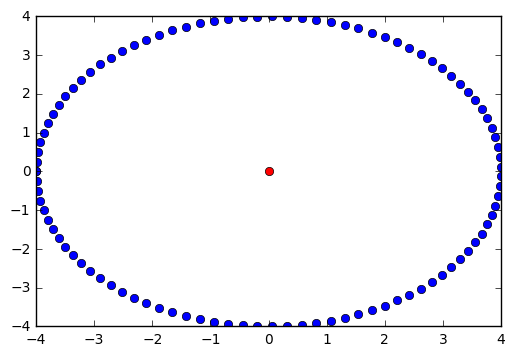

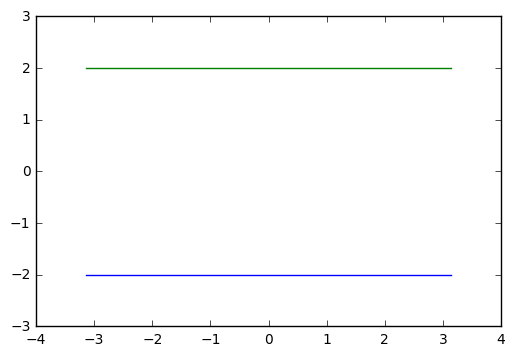

In [33]:
dt = -1
t = 1
e1 = 0
e2 = 0
t2 = t-dt
t1 = t+dt
N = 100
T = np.array([[0,t2],
              [0,0]])
E = np.array([[e1,t1],
              [t1, e2]])

ks = np.linspace(-1 * np.pi, np.pi, N)
energies = np.zeros((N, 2))
vecs = np.zeros((N, 2,2),dtype=np.complex) #last column picks eigenvector
hx = np.zeros(N)
hy = np.zeros(N)
for i in range(N):
    energies[i,:], vecs[i,:,:] = linalg.eigh(Hk(ks[i]))
    hx[i] = np.trace( Hk(ks[i]) @ sigma_x)
    hy[i] = np.trace( Hk(ks[i]) @ sigma_y)

#
plt.plot(hx,hy,'bo')
plt.plot([0], [0], 'ro')
plt.figure()

plt.plot(ks,energies[:,0])

plt.plot(ks,energies[:,1])
plt.ylim([-3,3])
lowerband = vecs[:,:,0]
print(np.vdot(lowerband[:],np.roll(lowerband,1,axis=0)[:]))

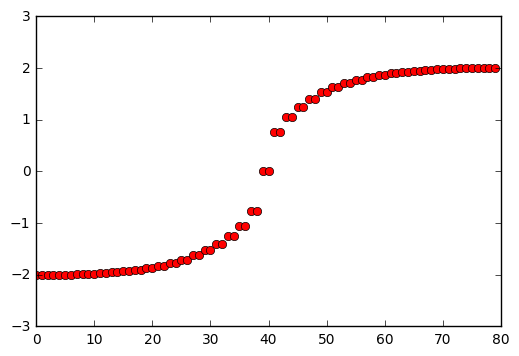

In [109]:
t = 1.0
N = 40
dt = 1.0 * np.cos(np.linspace(0, 2 * np.pi, N*2+1))[:-1]

e1 = 0
e2 = 0
t2 = t-dt
t1 = t+dt

T = np.array([[0,1],
              [0,0]])
E = np.array([[0,1],
              [1, 0]])

column = np.zeros(N)
column[1] = 1

offdiag = np.kron(linalg.circulant(column), T)
H = offdiag @ np.diag(t1) + np.kron(np.eye(N), E) @ np.diag(t2) + np.conj(np.transpose(offdiag)) @ np.diag(t1)

energies = linalg.eigvalsh(H)
plt.plot(energies, 'ro')

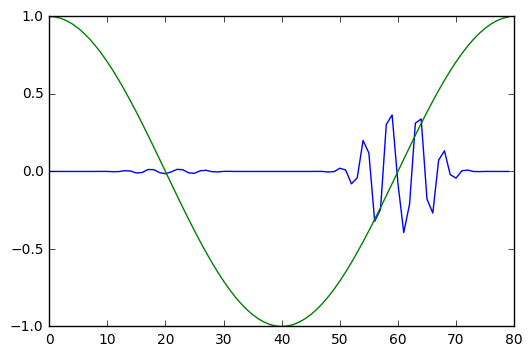

In [116]:
energies, vecs = linalg.eigh(H)
plt.plot(vecs[:,41])
plt.plot(dt)


In [59]:
print(t1)

[ 1.4         1.39873554  1.39495014  1.38866774  1.37992805  1.36878634
  1.35531305  1.33959334  1.32172663  1.30182585  1.28001683  1.25643746
  1.2312368   1.20457419  1.1766182   1.14754557  1.11754011  1.08679152
  1.05549421  1.02384605  0.99204712  0.96029848  0.92880084  0.89775335
  0.86735229  0.83778987  0.809253    0.78192209  0.75596994  0.73156063
  0.70884848  0.68797708  0.66907839  0.65227189  0.63766384  0.6253466
  0.61539804  0.60788105  0.60284317  0.60031624  0.60031624  0.60284317
  0.60788105  0.61539804  0.6253466   0.63766384  0.65227189  0.66907839
  0.68797708  0.70884848  0.73156063  0.75596994  0.78192209  0.809253
  0.83778987  0.86735229  0.89775335  0.92880084  0.96029848  0.99204712
  1.02384605  1.05549421  1.08679152  1.11754011  1.14754557  1.1766182
  1.20457419  1.2312368   1.25643746  1.28001683  1.30182585  1.32172663
  1.33959334  1.35531305  1.36878634  1.37992805  1.38866774  1.39495014
  1.39873554  1.4       ]
